# L1 and L2 Regularisation

In machine learning, a key challenge is enabling models to accurately predict outcomes on unseen data, not just on familiar training data. Regularisation is crucial for addressing overffiting, where a model memorises training data details but cannot generalise to new data. L1 (LASSO) and L2 (ridge regression) are ways in reducing overfitting by adding a penalty term to reduce overfitting. L1 adds a penalty based on the absolute value of the coefficients and L2 adds a penalty based on the square of the coefficients:
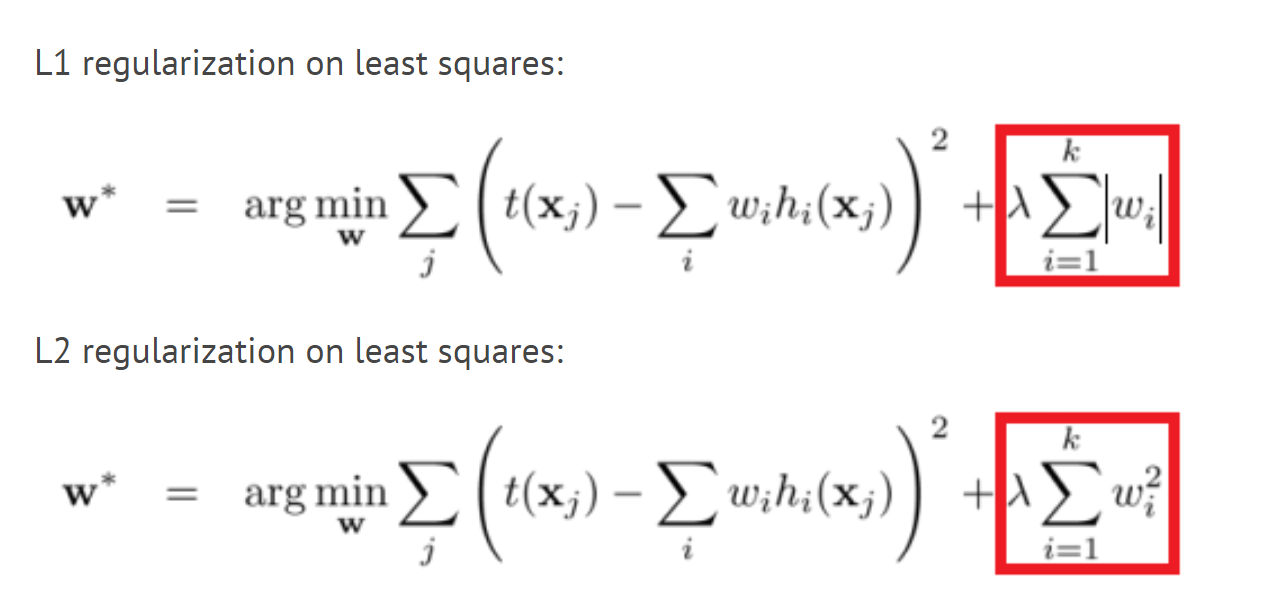

L1 leads to sparser models that sets coefficients to 0. L2 creates more evenly distributed weights by reducing them close to 0, but not 0.

In this project, I explored how the loss landscape for a simple random sample changes when the loss penalty, lambda, is changed for both L1 and L2 against a change in slope for the line of best fit when performing regression. Additionally, I explore how changing the number of samples within the data affect the loss landscape with different slopes of the line of best fit.

### Assumptions

- The underlying model is linear or approximately linear in its parameters.
- Features are on comparable scales (or have been standardised).
- Regularisation strength is treated as a hyperparameter and tuned appropriately.
- The objective balances data fit against model complexity.

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [2]:
# Create random values for regressioj
X, y = make_regression(n_samples=101, n_features=1, noise=30, random_state=42, bias = 1)
y += 150  # Shift values up
x = X.ravel()

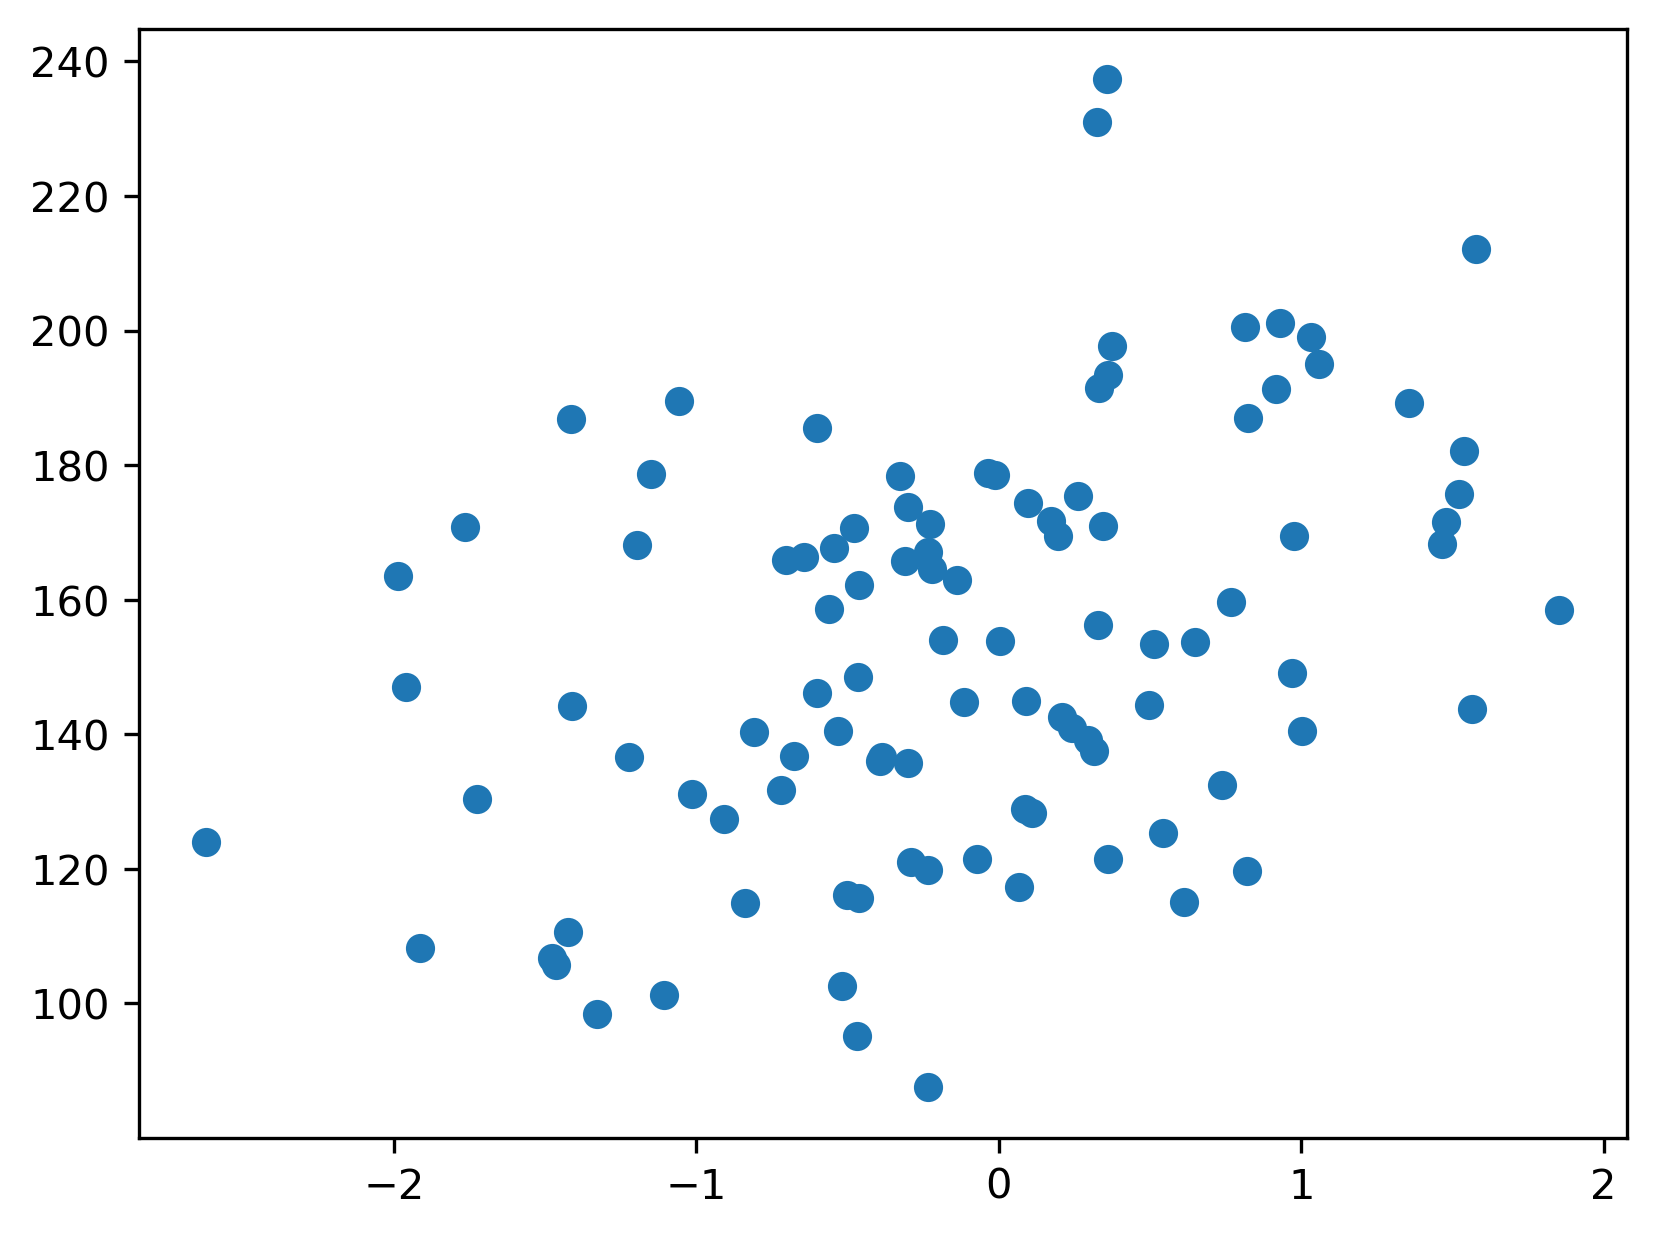

In [3]:
plt.scatter(x, y)
plt.show()

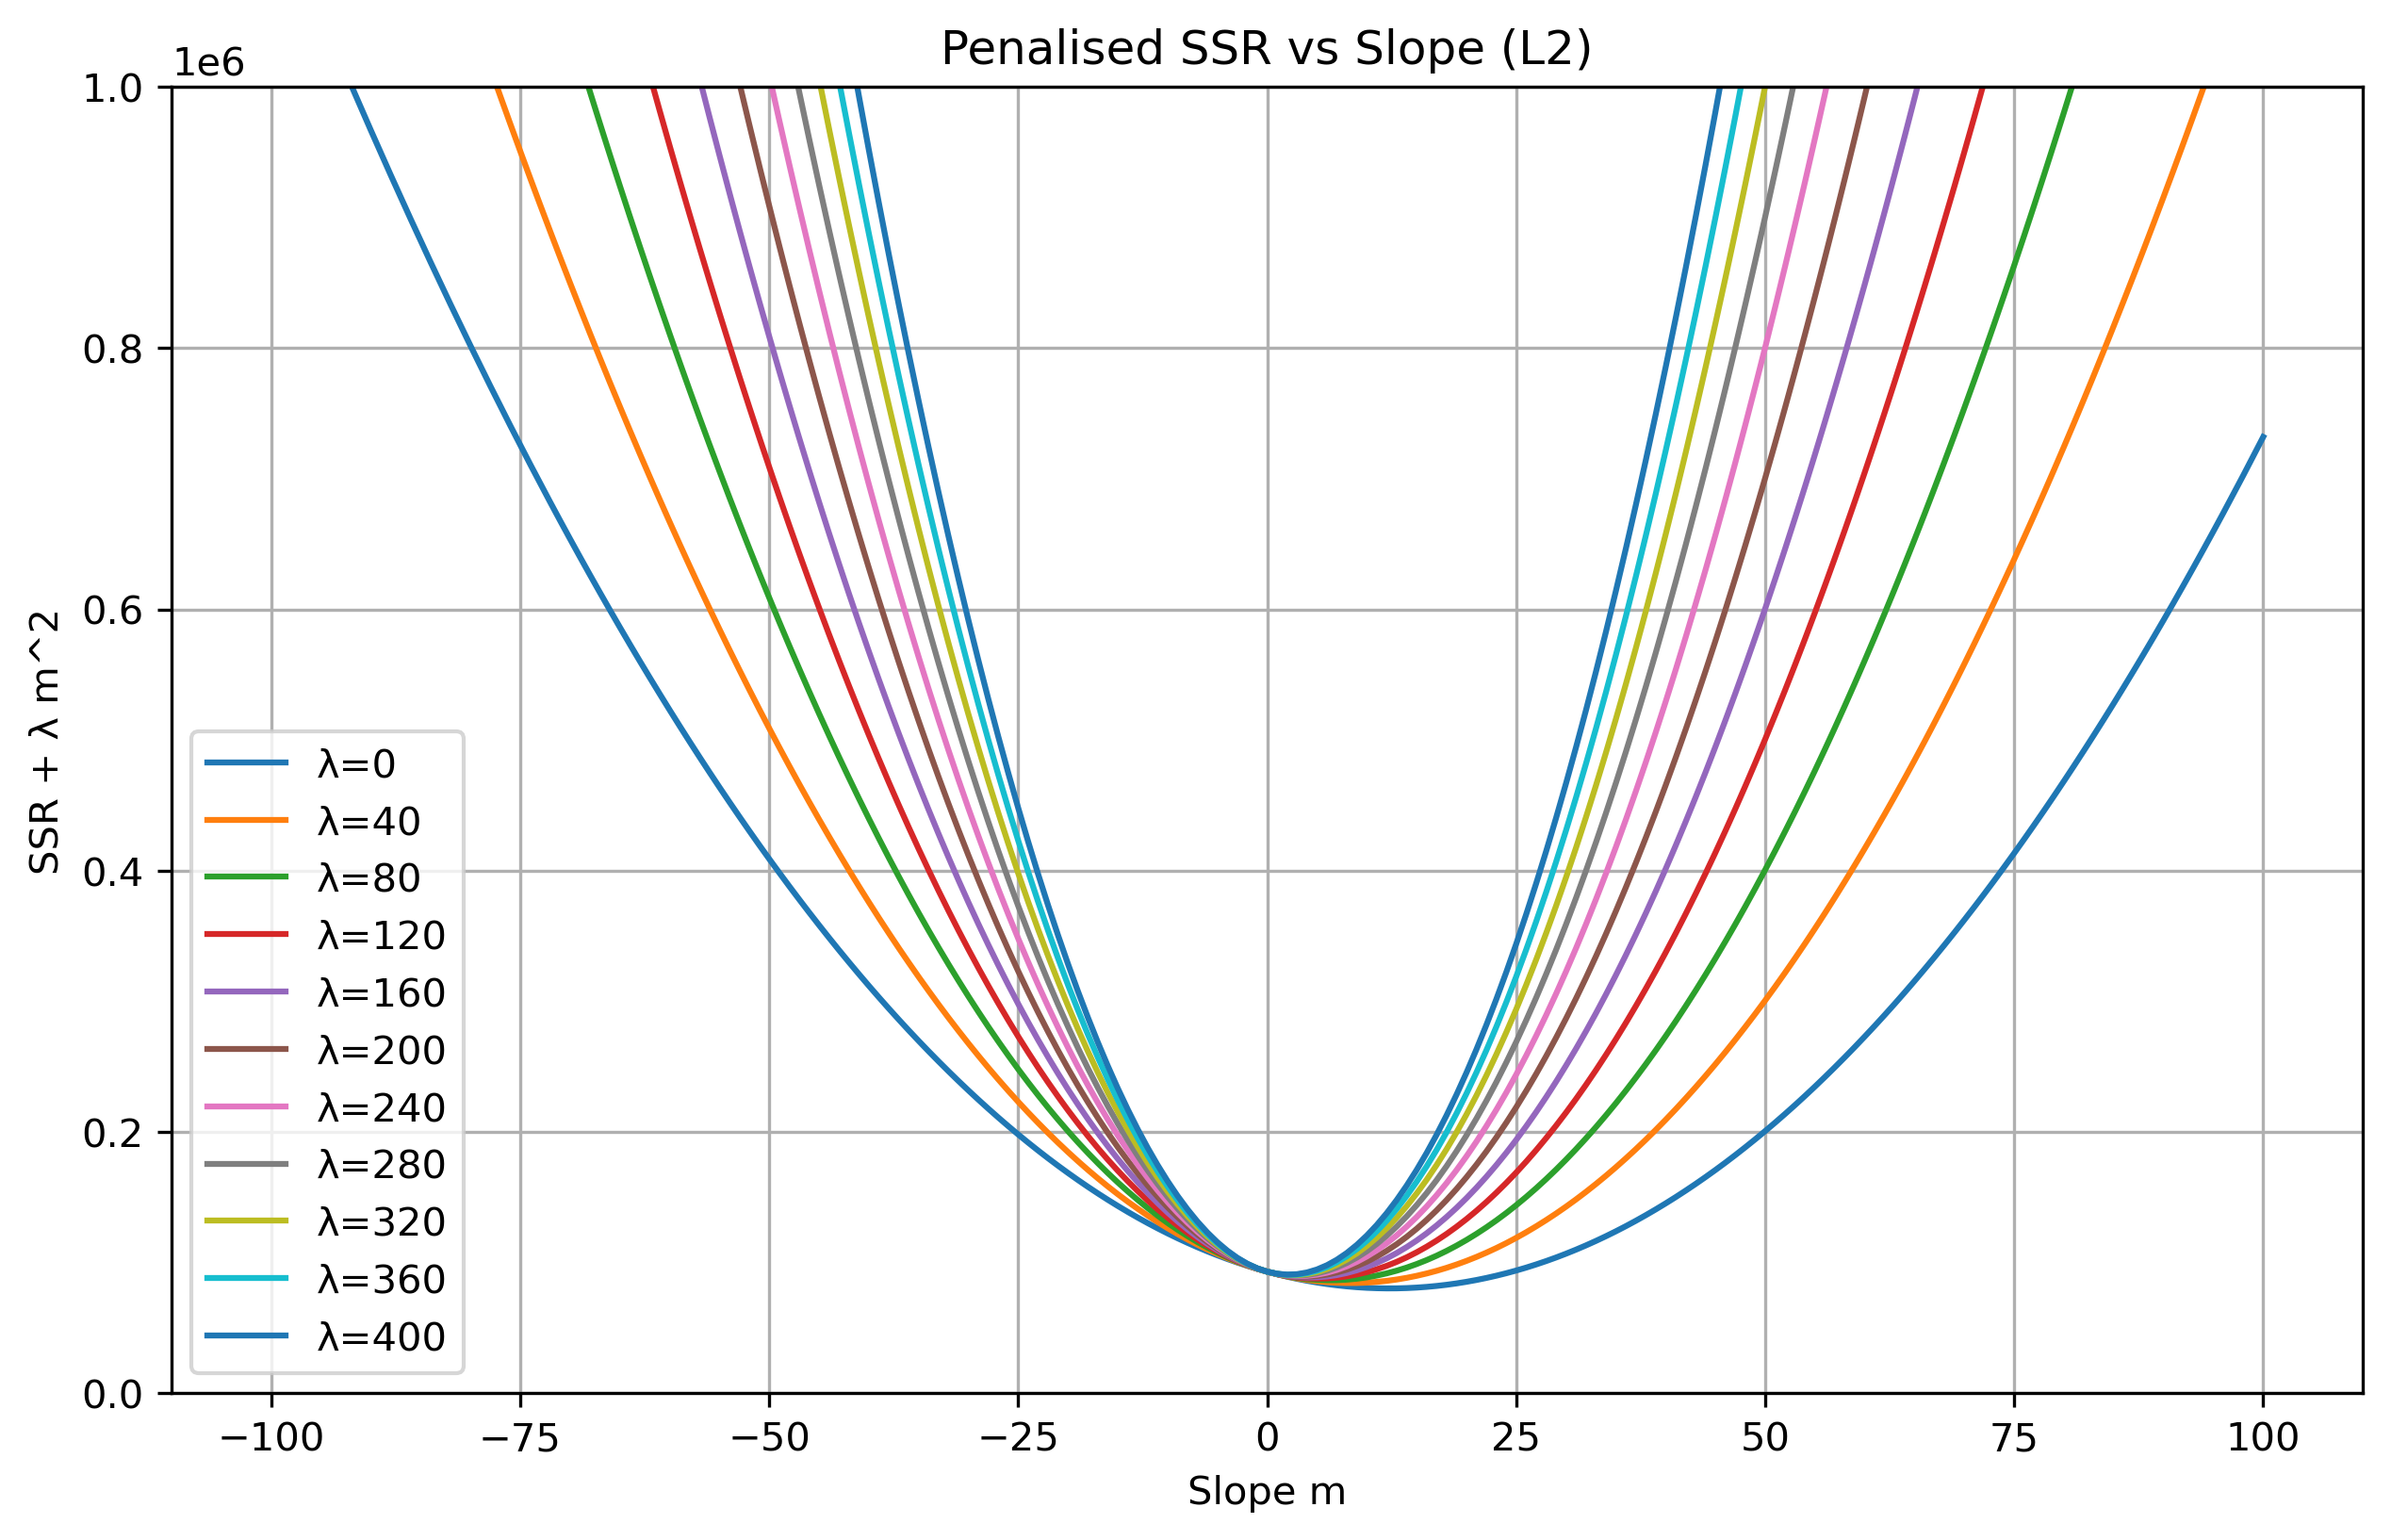

In [4]:
Lambdas = np.linspace(0, 400, 11) # Values of lambda to compare the curves against
Slopes = np.linspace(-100, 100, 1001, dtype=int) # Slope
Intercept = 150

Values = []
SSR = []

OBJ = np.zeros((len(Lambdas), len(Slopes)))
SSR = np.zeros_like(OBJ)

for i, lam in enumerate(Lambdas):
    for j, m in enumerate(Slopes):
        y_hat = Intercept + m*x
        ssr = np.sum(np.square(y - y_hat))
        SSR[i, j] = ssr
        OBJ[i, j] = ssr + lam * (np.square(m))

plt.figure(figsize=(10,6))
for i, lam in enumerate(Lambdas):
        plt.plot(Slopes, OBJ[i, :], label=f"λ={Lambdas[i]:.0f}")
plt.xlabel("Slope m")
plt.ylabel("SSR + λ m^2")
plt.ylim(0, 1e6)
plt.title("Penalised SSR vs Slope (L2)")
plt.legend()
plt.grid(True)
plt.show()

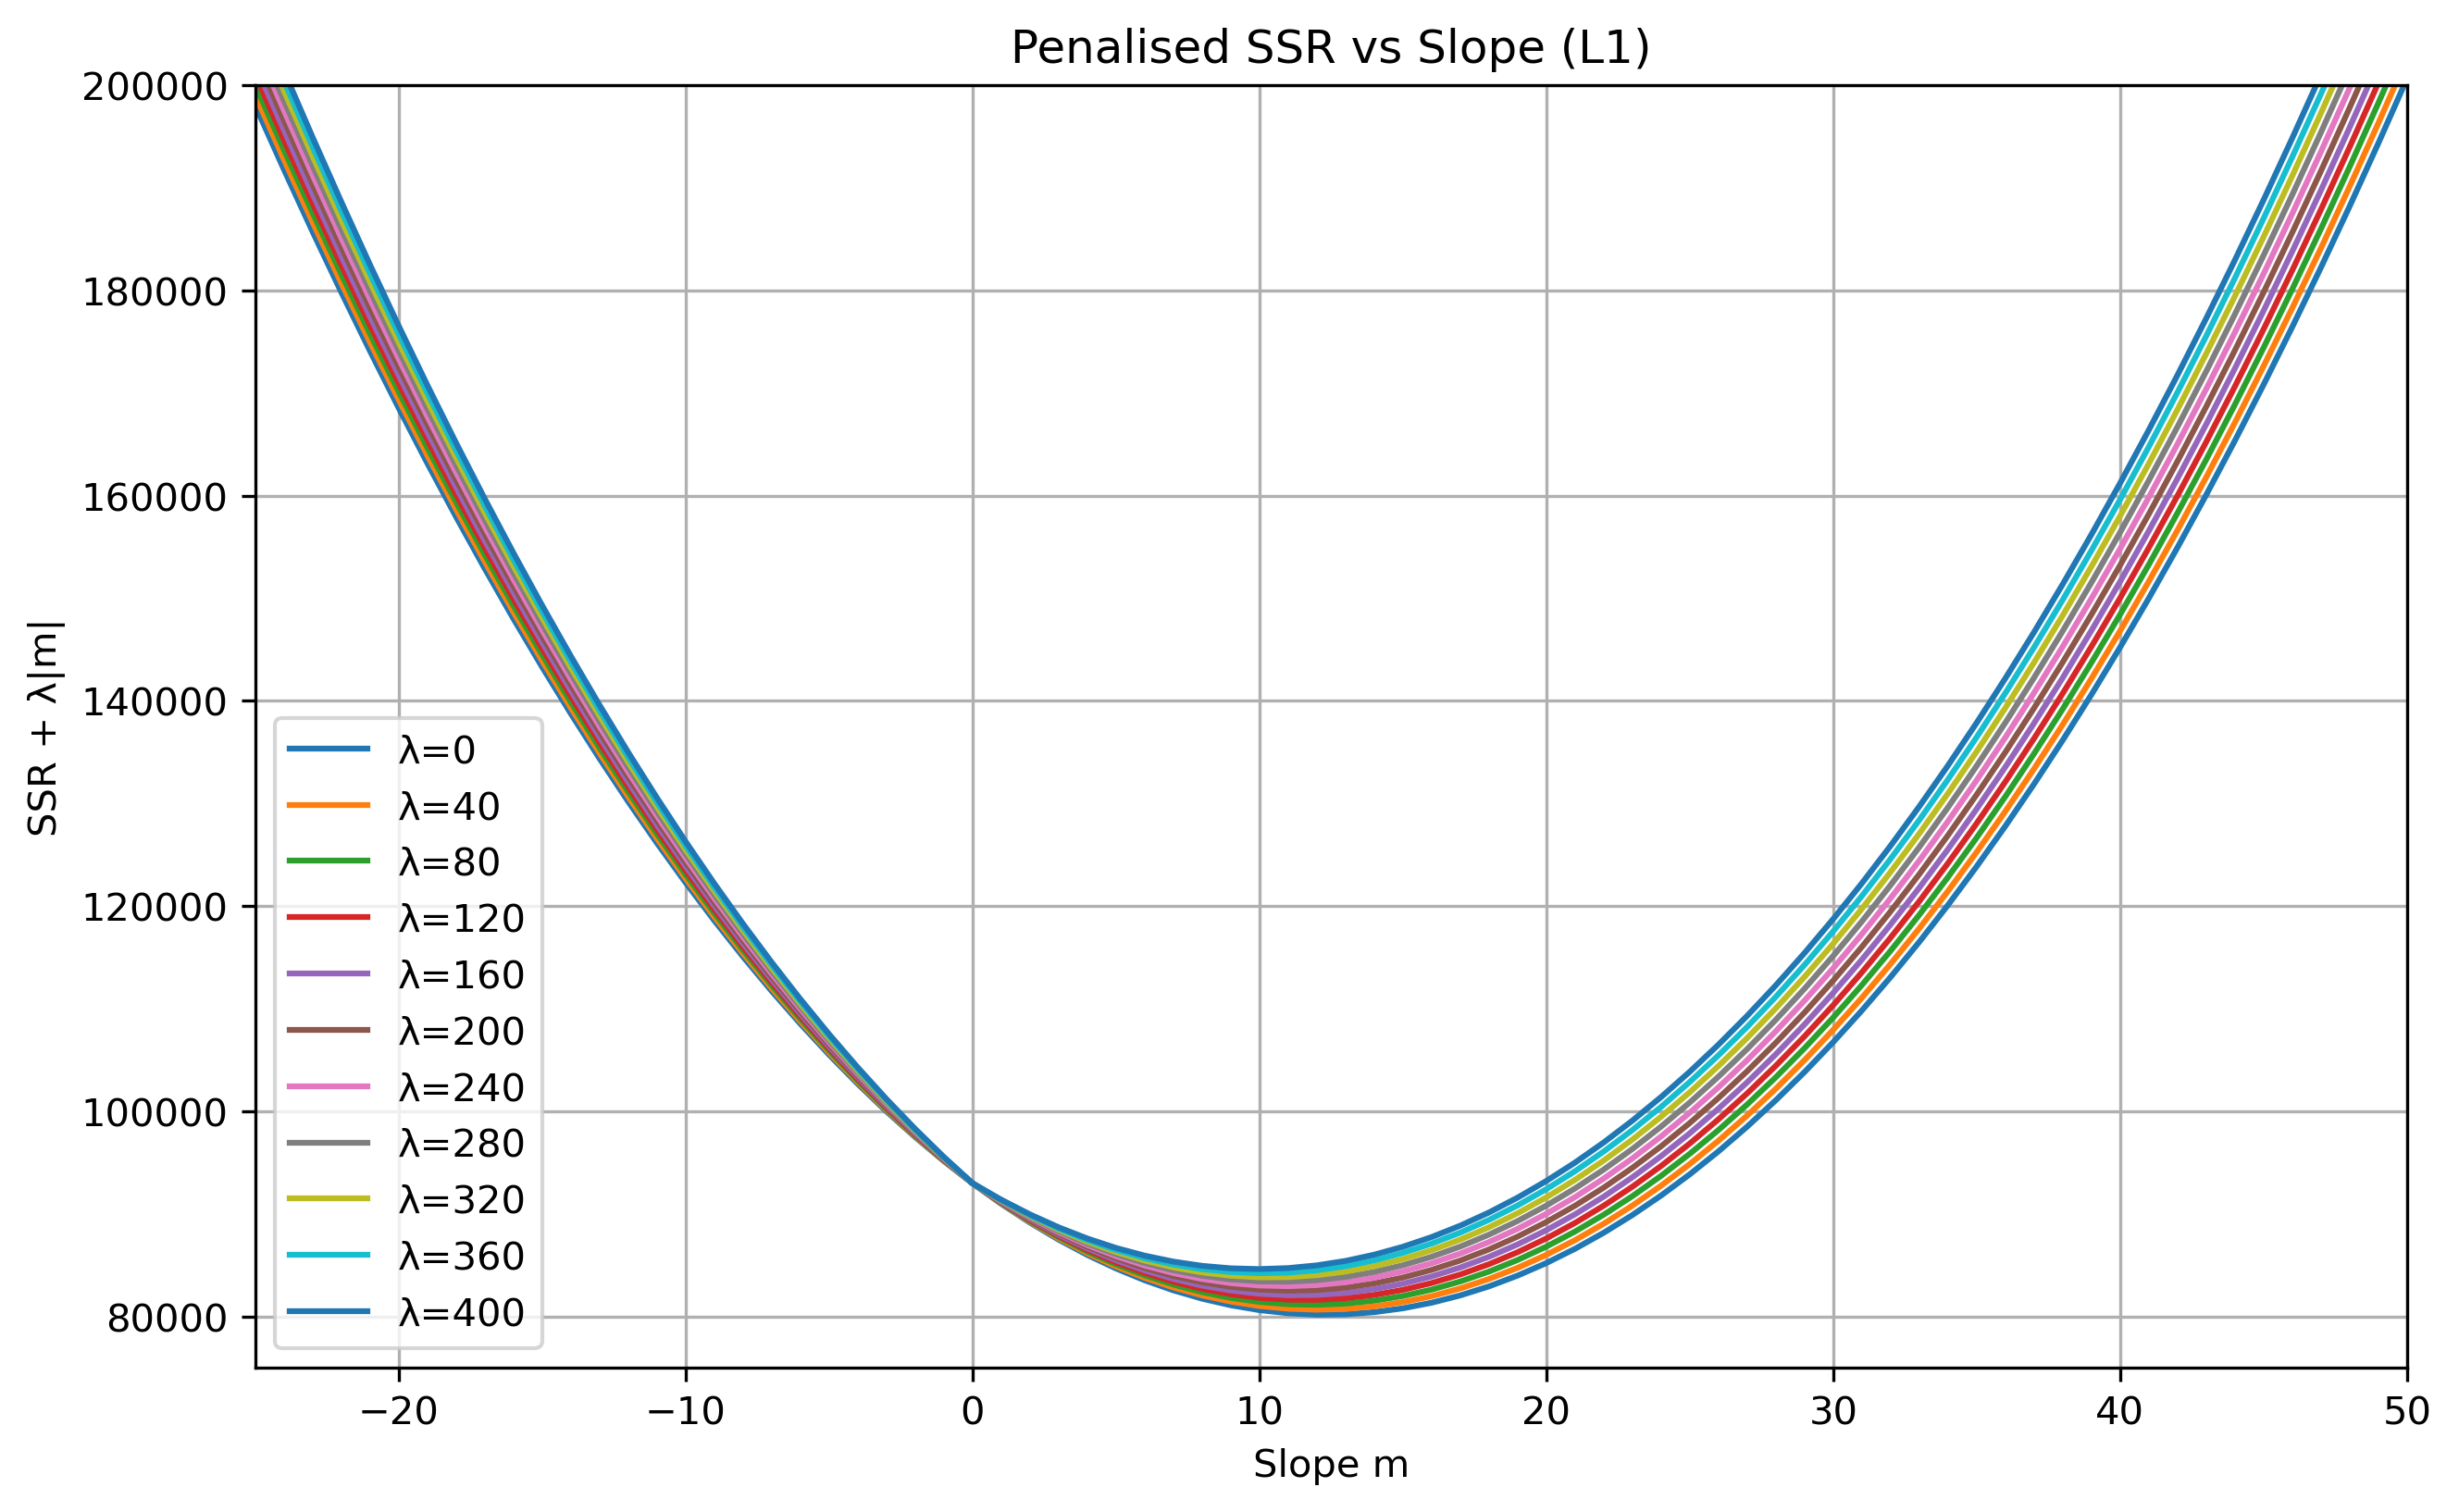

In [5]:
for i, lam in enumerate(Lambdas):
    for j, m in enumerate(Slopes):
        y_hat = Intercept + m*x
        ssr = np.sum(np.square(y - y_hat))
        SSR[i, j] = ssr
        OBJ[i, j] = ssr + lam * (np.abs(m))

plt.figure(figsize=(10,6))
for i, lam in enumerate(Lambdas):
        plt.plot(Slopes, OBJ[i, :], label=f"λ={Lambdas[i]:.0f}")
plt.xlim(-25, 50)
plt.xlabel("Slope m")
plt.ylim(75000, 0.2e6)
plt.ylabel("SSR + λ|m|")
plt.title("Penalised SSR vs Slope (L1)")
plt.legend()
plt.grid(True)
plt.show()

##### It can be seen the difference in shape between L1 and L2 regularisation. L2 regularisation shows a smooth quadratic curve while L1 has a point at 0 slope where it is non differentiable as it is a kink in the curve.

In [24]:
maxN = 2000
X_all, y_all = make_regression(n_samples=maxN, n_features=1, noise=30, random_state=54, bias = 1)
y_all += 150
x_all = X_all.ravel()
perm = np.random.RandomState(0).permutation(maxN)  # Fixed permutation for fairness
x_all, y_all = x_all[perm], y_all[perm]

Lambda = 50  # Keep constant while varying N
Ns = [25, 50, 101, 200, 400, 800, 1600]

def L1(y, x, m, Lambda, mse=False):
    y_hat = Intercept + m * x
    residual1 = np.square(y - y_hat)
    base = np.mean(residual1) if mse else np.sum(residual1)
    lam_eff = Lambda if mse == False else Lambda / len(y)  # Scaled by 1/n for MSE to compare
    return base + (lam_eff * (abs(m)))

def L2(y, x, m, Lambda, mse=False):
    y_hat = Intercept + m * x
    residual2 = np.square(y - y_hat)
    base = np.mean(residual2) if mse else np.sum(residual2)
    lam_eff = Lambda if mse == False else Lambda / len(y)  # Scaled by 1/n for MSE to compare
    return base + (lam_eff * (np.square(m)))

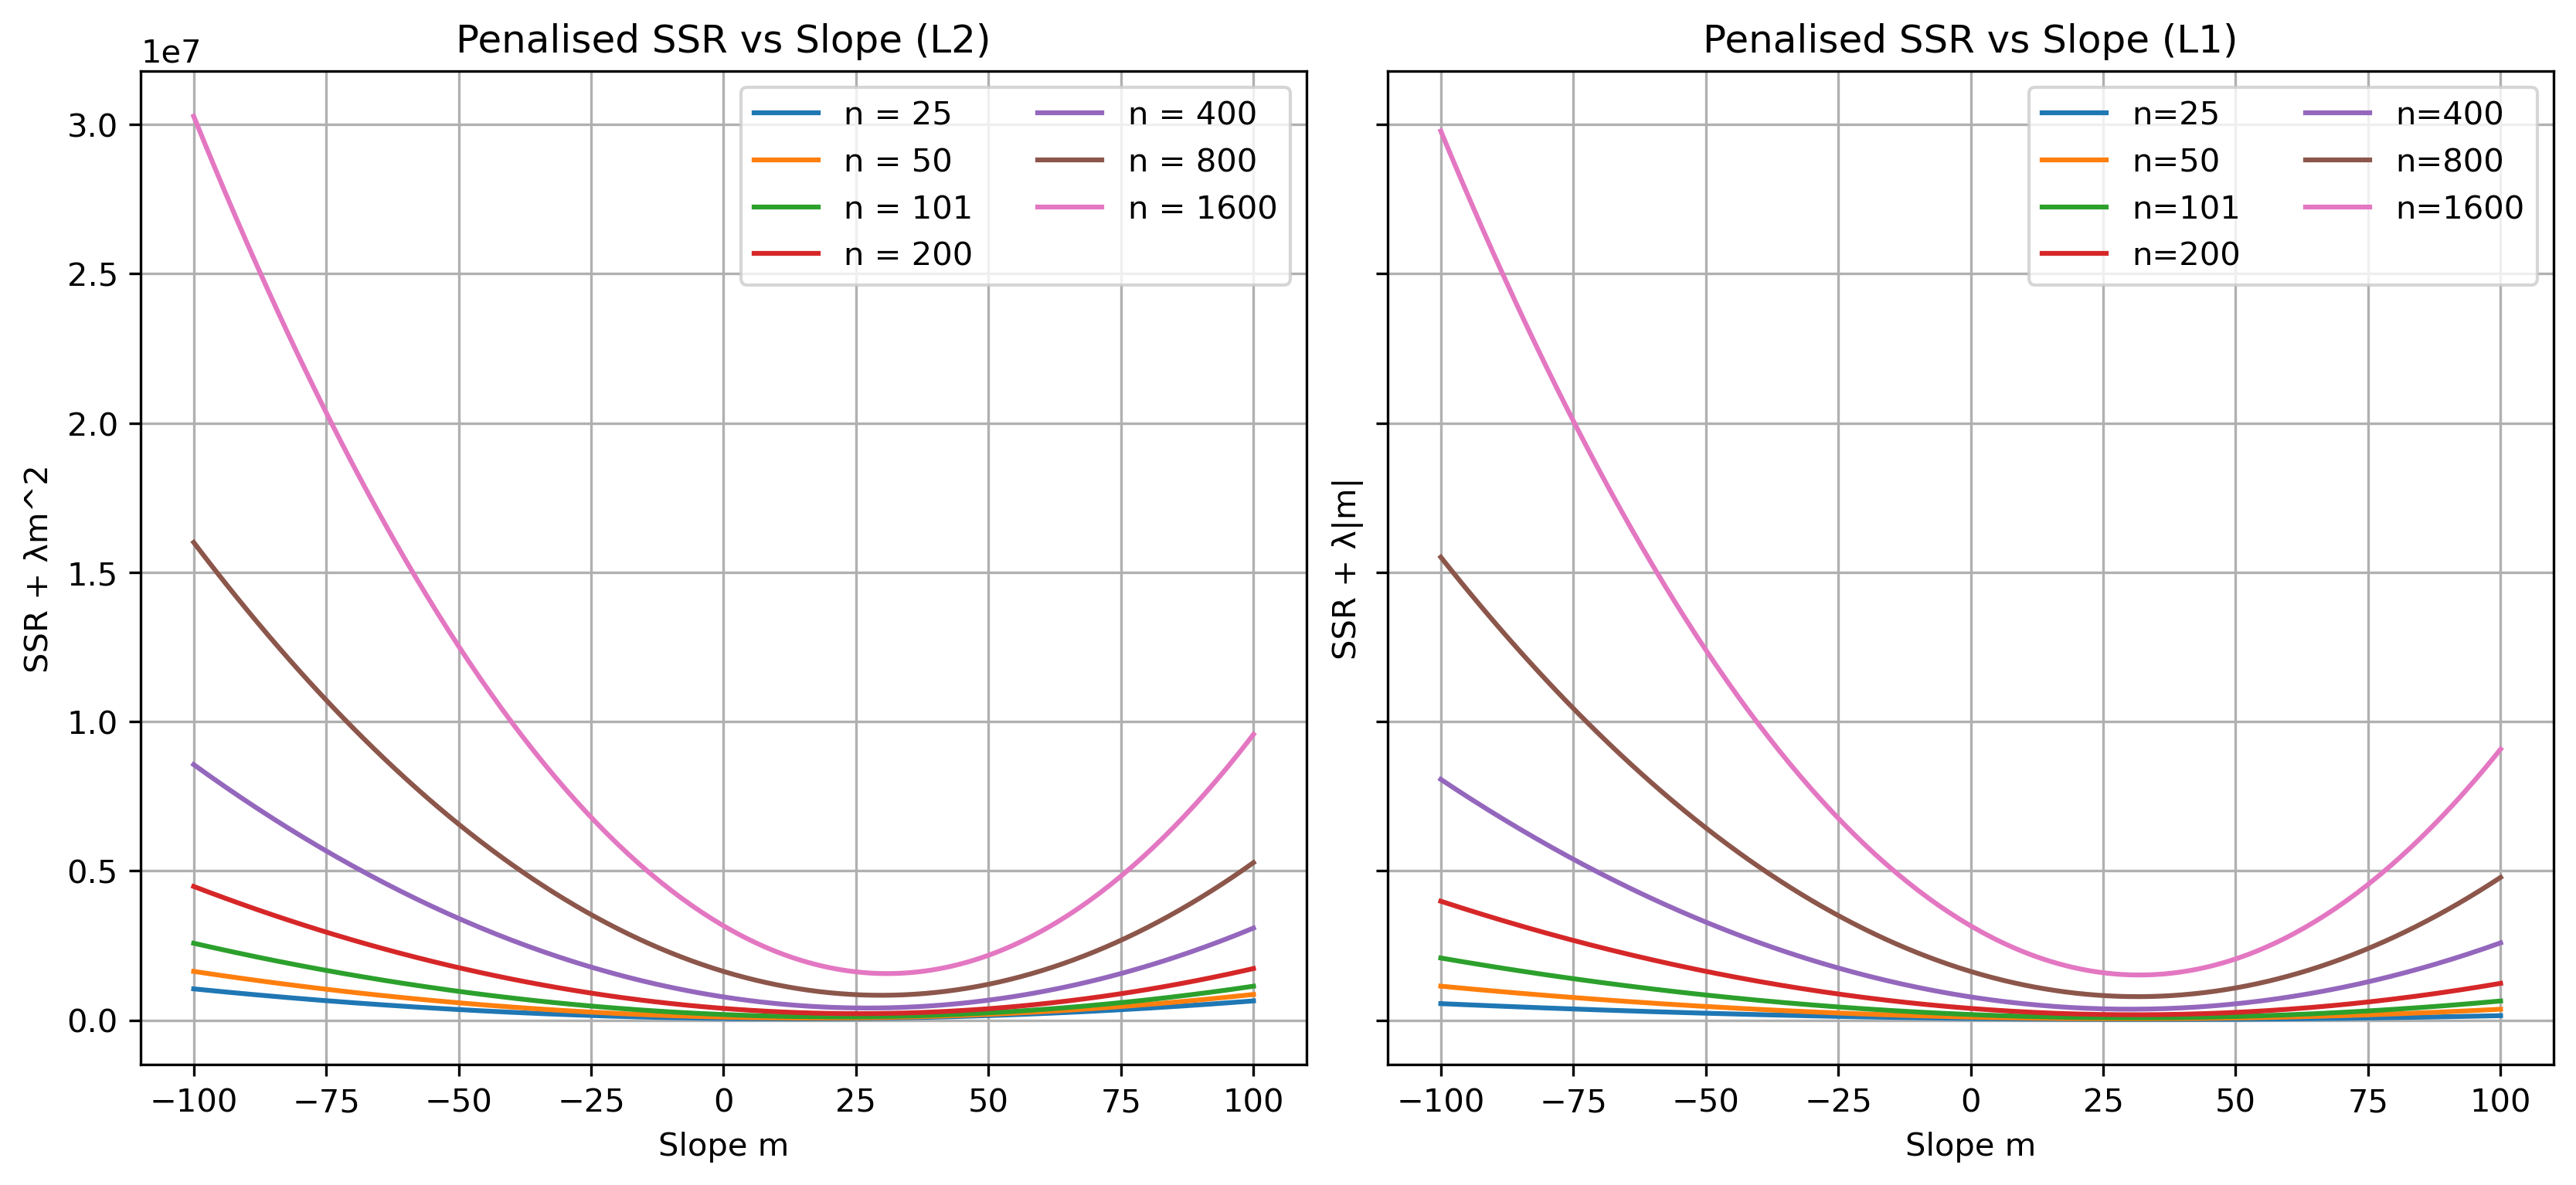

In [25]:
fig, axes = plt.subplots(ncols=2, figsize=(11,5), sharey=True, constrained_layout=True)

for n in Ns:
    x = x_all[:n]
    y = y_all[:n]
    OBJ = np.array([L2(y, x, m, Lambda) for m in Slopes])
    axes[0].plot(Slopes, OBJ, label=f"n = {n}")
axes[0].set_xlabel("Slope m")
axes[0].set_ylabel("SSR + λm^2")
axes[0].set_title(f"Penalised SSR vs Slope (L2)")
axes[0].legend(ncol=2)
axes[0].grid(True)


for n in Ns:
    x = x_all[:n]
    y = y_all[:n]
    OBJ = np.array([L1(y, x, m, Lambda) for m in Slopes])
    axes[1].plot(Slopes, OBJ, label=f"n={n}")
axes[1].set_xlabel("Slope m")
axes[1].set_ylabel("SSR + λ|m|")
axes[1].set_title(f"Penalised SSR vs Slope (L1)")
axes[1].legend(ncol=2)
axes[1].grid(True)
plt.show()

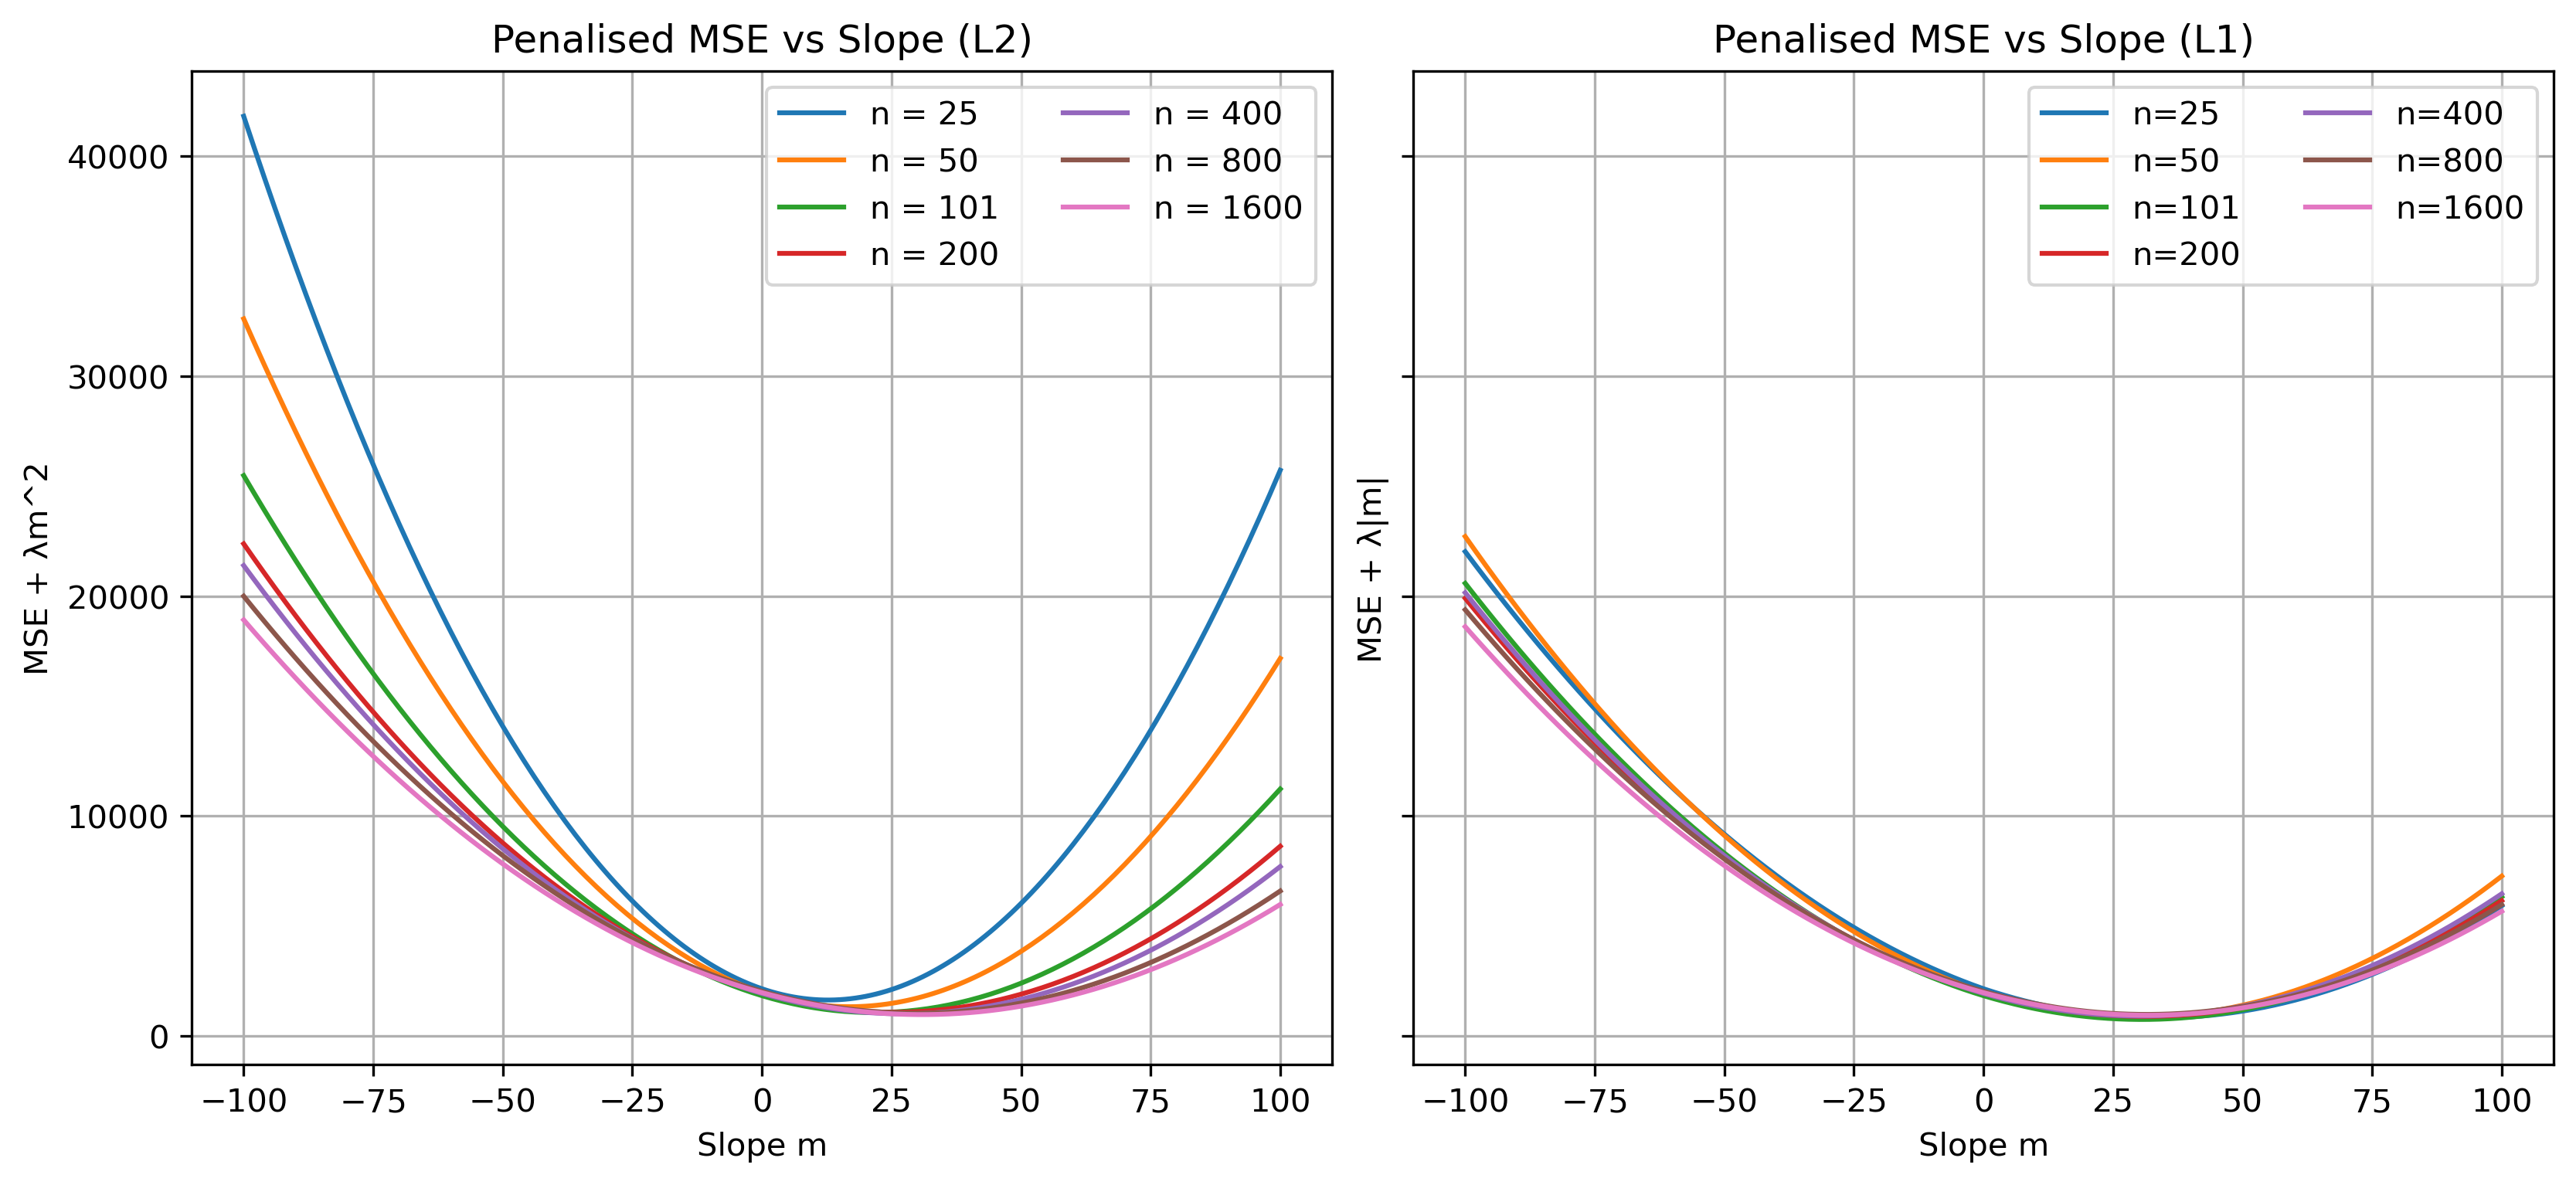

In [26]:
# Use MSE for (hopefully) better comparison

fig, axes = plt.subplots(ncols=2, figsize=(11,5), sharey=True, constrained_layout=True)

for n in Ns:
    x = x_all[:n]
    y = y_all[:n]
    OBJ = np.array([L2(y, x, m, Lambda, mse=True) for m in Slopes])
    axes[0].plot(Slopes, OBJ, label=f"n = {n}")
axes[0].set_xlabel("Slope m")
axes[0].set_ylabel("MSE + λm^2")
axes[0].set_title(f"Penalised MSE vs Slope (L2)")
axes[0].legend(ncol=2)
axes[0].grid(True)


for n in Ns:
    x = x_all[:n]
    y = y_all[:n]
    OBJ = np.array([L1(y, x, m, Lambda, mse=True) for m in Slopes])
    axes[1].plot(Slopes, OBJ, label=f"n={n}")
axes[1].set_xlabel("Slope m")
axes[1].set_ylabel("MSE + λ|m|")
axes[1].set_title(f"Penalised MSE vs Slope (L1)")
axes[1].legend(ncol=2)
axes[1].grid(True)
plt.show()

### Key takeaways

- L1 regularisation promotes sparsity and can perform implicit feature selection.
- L2 regularisation shrinks coefficients smoothly and improves numerical stability.
- The choice between L1 and L2 affects interpretability and variance differently.
- Regularisation controls overfitting by constraining model complexity rather than altering data.